In [1]:
#Exercise 4.4

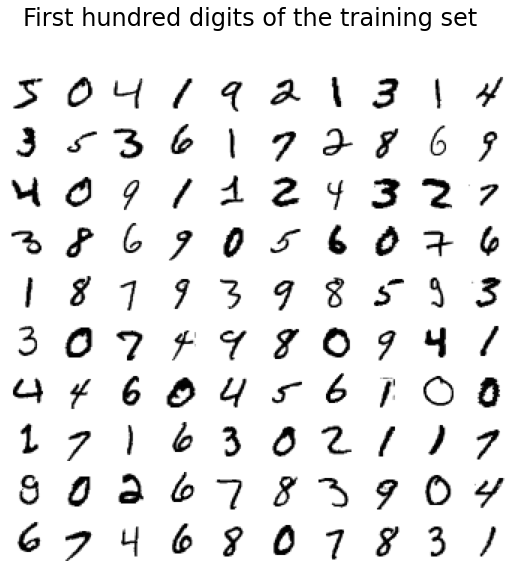

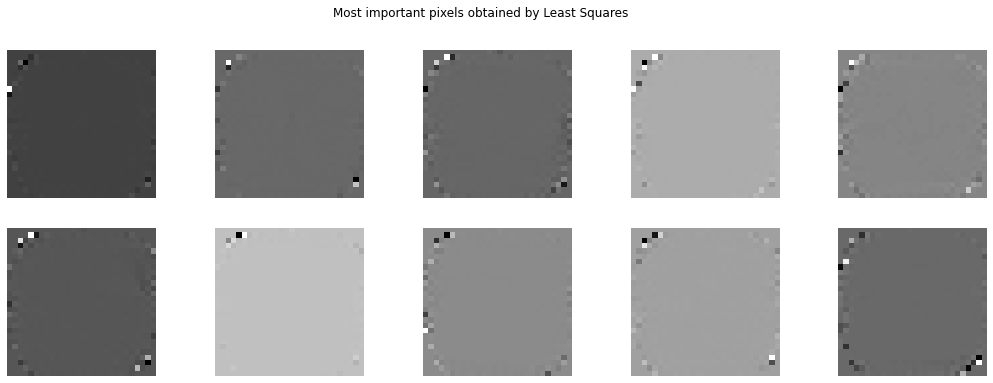

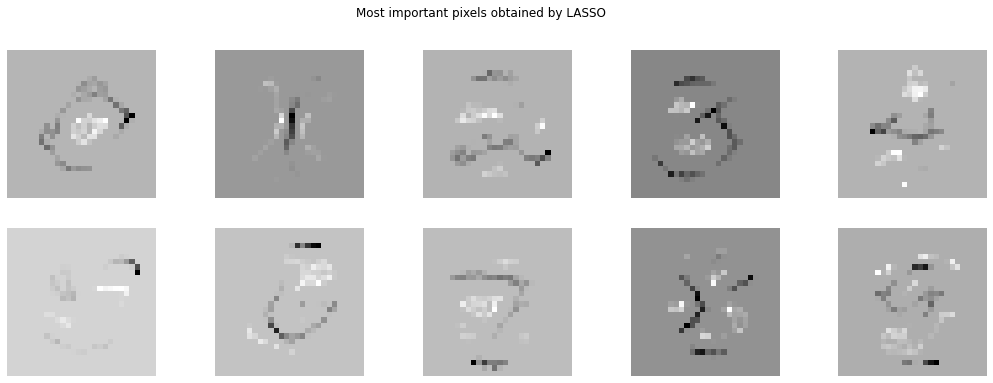

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame = True)

mnist_data = pd.concat([mnist['target'], mnist['data']], axis=1)
mnist_data.head()
y = mnist_data['class'].astype(float)
X  = mnist_data.drop('class', axis = 1)
y = y[:60000]
X = X[:60000]
y = pd.get_dummies(y)
def plot_digit(image_data):
    image = np.array(image_data).reshape(28,28)
    plt.imshow(image, cmap = "binary")
    plt.axis("off")

fig = plt.figure(figsize = (9,9))
for idx in range(100):
    plt.subplot(10,10, idx+1)
    some_digit = X.iloc[idx]
    plot_digit(some_digit)

fig.suptitle("First hundred digits of the training set", fontsize=24)
plt.show()
least_squares = np.linalg.pinv(X) @ y
fig = plt.figure(figsize = (18,6))
fig.suptitle("Most important pixels obtained by Least Squares")
for idx in range(10):
    plt.subplot(2,5, idx+1)
    some_digit = least_squares[idx]
    plot_digit(some_digit)
    
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 1.0, fit_intercept=False).fit(X, y)
lasso = lasso_reg.coef_
fig = plt.figure(figsize = (18,6))
fig.suptitle("Most important pixels obtained by LASSO")
for idx in range(10):
    plt.subplot(2,5, idx+1)
    some_digit = lasso[idx,:]
    plot_digit(some_digit)